### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import data

In [2]:
data = pd.read_csv("../CarPrice_Assignment.csv")
data.drop(["car_ID"], axis = 1, inplace = True)

In [3]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data["brand"] = np.array([data["CarName"][i].split(' ')[0] for i in range(data.shape[0])])
data.drop(["CarName"], axis = 1, inplace = True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [5]:
print (data.dtypes)

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
brand                object
dtype: object


In [6]:
obj_cols = []
for col in data.columns:
    if data[col].dtype == "object":
        obj_cols.append(col)

print (obj_cols)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']


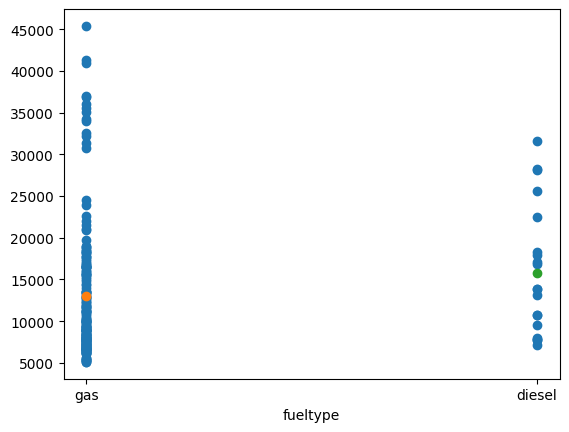

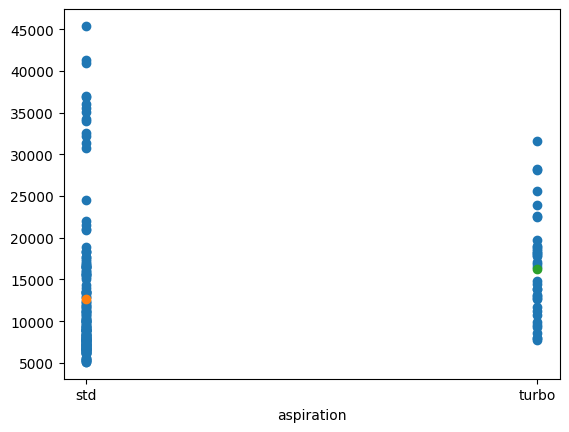

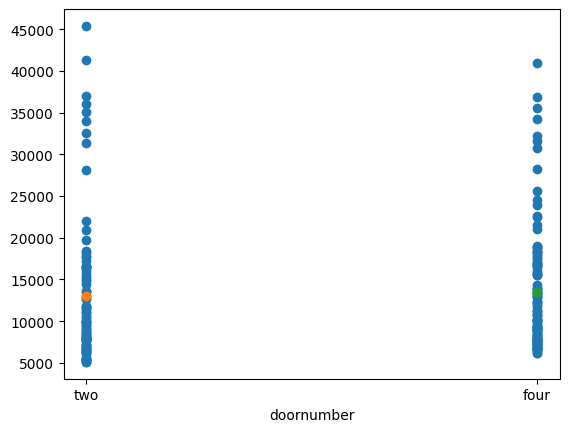

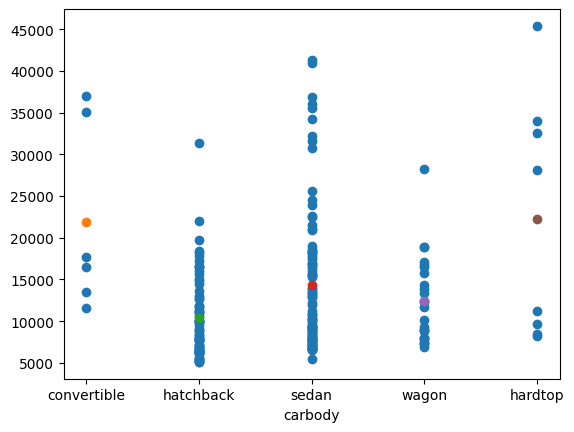

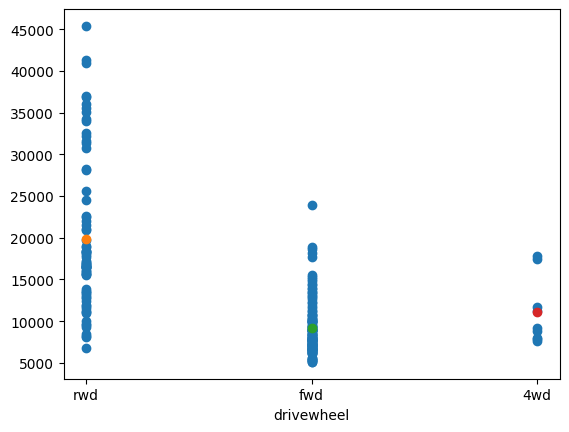

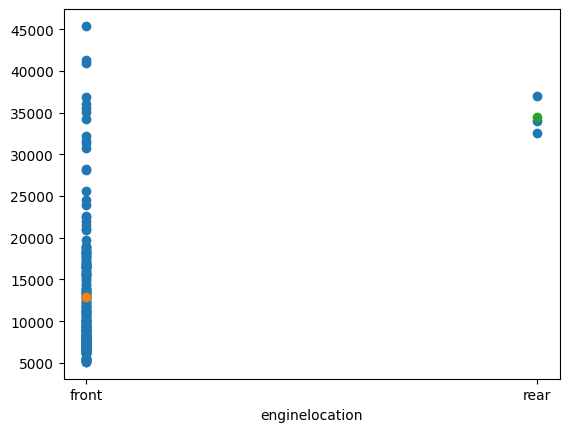

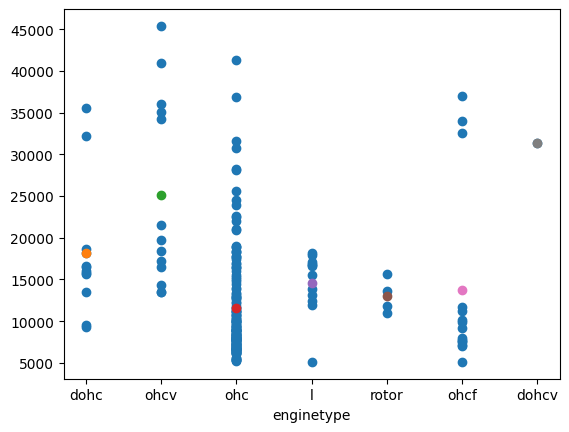

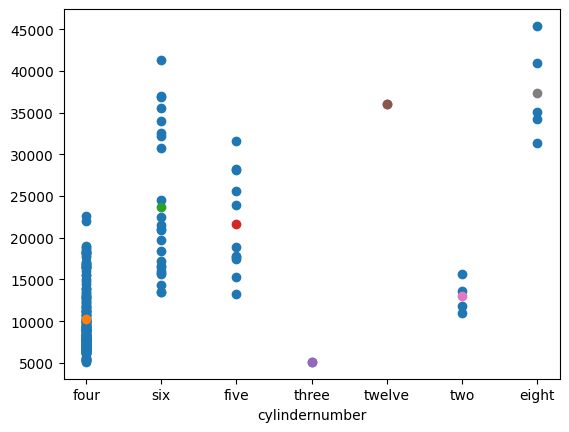

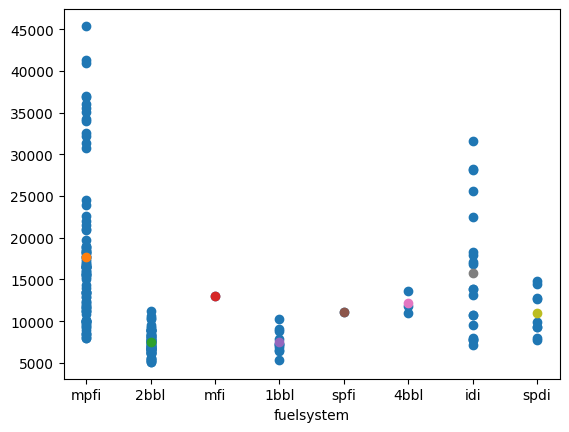

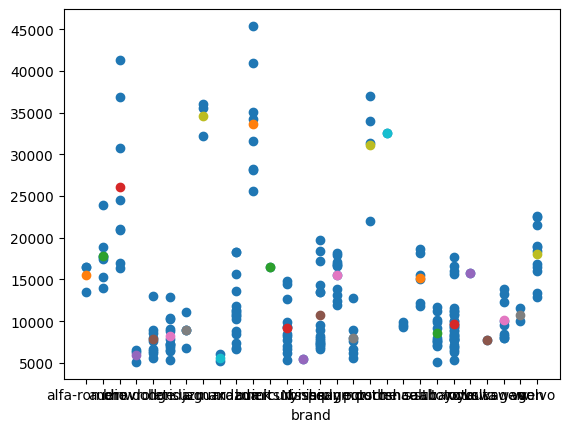

In [7]:
for col in obj_cols:
    plt.scatter(data[col], data["price"])
    for v in data[col].unique():
        plt.scatter(v, data[data[col] == v]["price"].mean())
    plt.xlabel(col)
    plt.show()

In [8]:
brand:dict = {}
for v in data["brand"]:
    if (x := data[data["brand"] == v]["price"].mean()) > 25000:
        brand[v] = 2
    elif x > 15000:
        brand[v] = 1
    else:
        brand[v] = 0

print (brand)

{'alfa-romero': 1, 'audi': 1, 'bmw': 2, 'chevrolet': 0, 'dodge': 0, 'honda': 0, 'isuzu': 0, 'jaguar': 2, 'maxda': 0, 'mazda': 0, 'buick': 2, 'mercury': 1, 'mitsubishi': 0, 'Nissan': 0, 'nissan': 0, 'peugeot': 1, 'plymouth': 0, 'porsche': 2, 'porcshce': 2, 'renault': 0, 'saab': 1, 'subaru': 0, 'toyota': 0, 'toyouta': 1, 'vokswagen': 0, 'volkswagen': 0, 'vw': 0, 'volvo': 1}


In [9]:
print (data["brand"].isnull().any())

False


In [10]:
data["Brand"] = np.ones(data.shape[0])
for i in range(data.shape[0]):
    data["Brand"][i] = brand.get(data["brand"][i]) 

/tmp/ipykernel_4360/1599770976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Brand"][i] = brand.get(data["brand"][i])


In [11]:
data.drop(obj_cols, axis = 1, inplace = True)

### Save the data

In [12]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1.0


In [13]:
print (data.dtypes)

symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Brand               float64
dtype: object


In [14]:
data.to_csv("data.csv", index = False)